In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_census = pd.read_csv('dataset/adult.data.csv', header=None)
df_census

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df_census.columns = col_names

In [4]:
df_census.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19518,29,Self-emp-not-inc,181466,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,35,United-States,<=50K
27523,30,Self-emp-not-inc,45427,Assoc-voc,11,Divorced,Craft-repair,Not-in-family,White,Male,0,0,49,United-States,<=50K
28659,36,State-gov,98037,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
9650,69,?,167826,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
20178,22,Private,283499,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K
22773,41,Self-emp-inc,299813,9th,5,Married-civ-spouse,Sales,Wife,White,Female,0,0,70,Dominican-Republic,<=50K
25947,42,Private,93770,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
22177,53,Private,274276,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
31900,37,Private,271013,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
15170,25,Private,234190,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,<=50K


In [5]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
def get_categorical_counts(df, cols):
    for col in cols:
        print(f'{col}------------------------------')
        print(df[col].value_counts())


In [22]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [23]:
get_categorical_counts(df_census, categorical_columns)

workclass------------------------------
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education------------------------------
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status------------------------------
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spous

In [28]:
X = df_census.drop(columns=['income'], axis=1)
y = df_census['income']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.fit_transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [43]:
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
y_train_predict, y_test_predict

(array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype=object),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

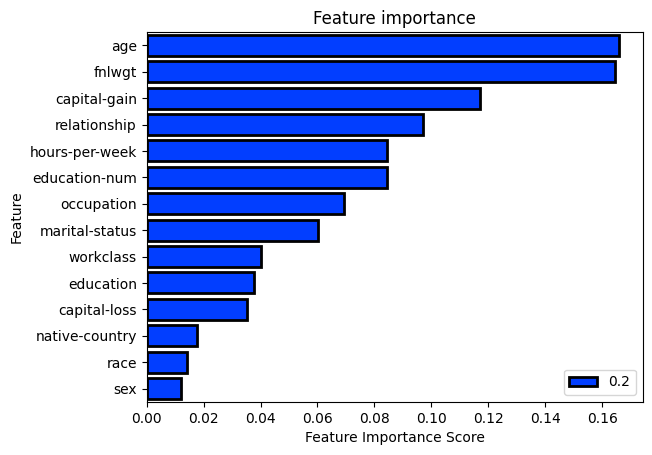

In [49]:
import seaborn as sns

features_scores = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=features_scores, y=features_scores.index, palette='bright', hue=0.2,  saturation=2.0, edgecolor='black', linewidth=2)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title("Feature importance")
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def get_metrics(y_train, y_train_pred, y_test, y_test_pred):
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'train accuracy: {train_accuracy}')
    print(f'test accuracy: {test_accuracy}')

    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    print(f'train cm: \n {train_cm}')
    print(f'test cm: \n {test_cm}')

    train_cr = classification_report(y_train, y_train_pred)
    test_cr = classification_report(y_test, y_test_pred)

    print(f'train cr: {train_cr}')
    print(f'test cr: {test_cr}')

In [47]:
get_metrics(y_train, y_train_predict, y_test, y_test_predict)

train accuracy: 0.9873639873639873
test accuracy: 0.8239328488074521
train cm: 
 [[17237    28]
 [  260  5267]]
test cm: 
 [[6955  500]
 [1220 1094]]
train cr:               precision    recall  f1-score   support

       <=50K       0.99      1.00      0.99     17265
        >50K       0.99      0.95      0.97      5527

    accuracy                           0.99     22792
   macro avg       0.99      0.98      0.98     22792
weighted avg       0.99      0.99      0.99     22792

test cr:               precision    recall  f1-score   support

       <=50K       0.85      0.93      0.89      7455
        >50K       0.69      0.47      0.56      2314

    accuracy                           0.82      9769
   macro avg       0.77      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769

